In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# supress warning messages
import warnings
warnings.filterwarnings("ignore")
# import machine learning model libraries
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [23]:
pwd

'C:\\Users\\uday9\\OneDrive\\Desktop\\data science classes'

In [24]:
cd ./complaints/

C:\Users\uday9\OneDrive\Desktop\data science classes\complaints


In [25]:
#importing dataset
complaints = pd.read_csv("../complaints/complaints.csv")

In [26]:
#first 45 records
complaints.head(45)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760
5,11/13/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Phone,11/20/2013,Closed with monetary relief,Yes,No,596562
6,6/16/2015,Debt collection,Medical,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Company believes it acted appropriately as aut...,Web,6/19/2015,Closed with explanation,Yes,No,1422680
7,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Web,6/15/2015,Closed with explanation,Yes,No,1420702
8,11/13/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,Referral,12/10/2015,Closed with explanation,Yes,Yes,1654890
9,10/21/2014,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Web,10/21/2014,Closed with explanation,Yes,No,1079567


In [27]:
#extracting year from column  Date sent to company
complaints['year']=pd.DatetimeIndex(complaints['Date sent to company']).year

In [28]:
#extracting month from column  Date sent to company
complaints['month']=pd.DatetimeIndex(complaints['Date sent to company']).month

In [29]:
complaints.shape

(903983, 15)

In [30]:
#checking for null values
complaints.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              135408
Complaint ID                         0
year                                 0
month                                0
dtype: int64

In [31]:
#top priority and least priority issues 
tot_issues=complaints['Issue'].value_counts()
head_tot_issues=tot_issues.head(30)
tail_tot_issues=tot_issues.tail(30)

In [32]:
tot_sub_issues=complaints['Sub-issue'].value_counts()
head_sub_iss=tot_sub_issues.head(30)
tail_sub_iss=tot_sub_issues.tail(30)

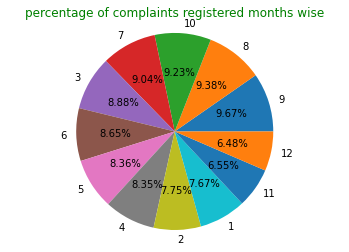

In [33]:
#pie chart representing percent of complains registered monthly
month_wise_comp=complaints.month.value_counts()
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(month_wise_comp, explode=explode, labels=list(month_wise_comp.index), autopct='%1.2f%%')
ax1.axis('equal')
plt.title("percentage of complaints registered months wise",color='green')
plt.show()

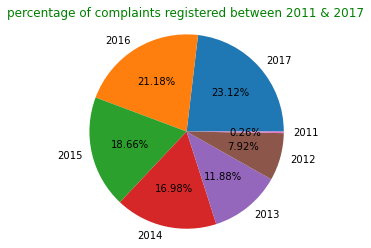

In [34]:
#pie chart representing percent of complains registered yearly
year_wise_comp=complaints.year.value_counts()
explode = (0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(year_wise_comp, explode=explode, labels=list(year_wise_comp.index), autopct='%1.2f%%')
ax1.axis('equal')
plt.title("percentage of complaints registered between 2011 & 2017",color='green')
plt.show()

Text(0.5, 0, 'name of the issue')

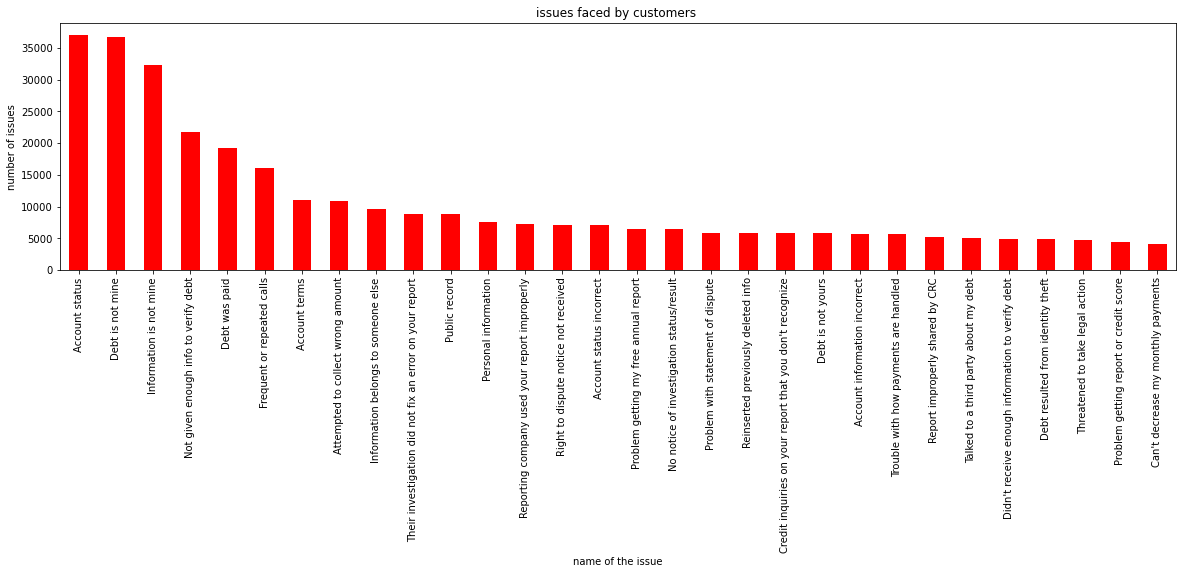

In [35]:
#plot representing most number of sub-issues faced by consumers
plt.subplot(211)
head_sub_iss.plot(kind='bar',color='red', title='issues faced by customers ',figsize=(20,10))
plt.ylabel("number of issues")
plt.xlabel("name of the issue")


Text(0.5, 0, 'name of the issue')

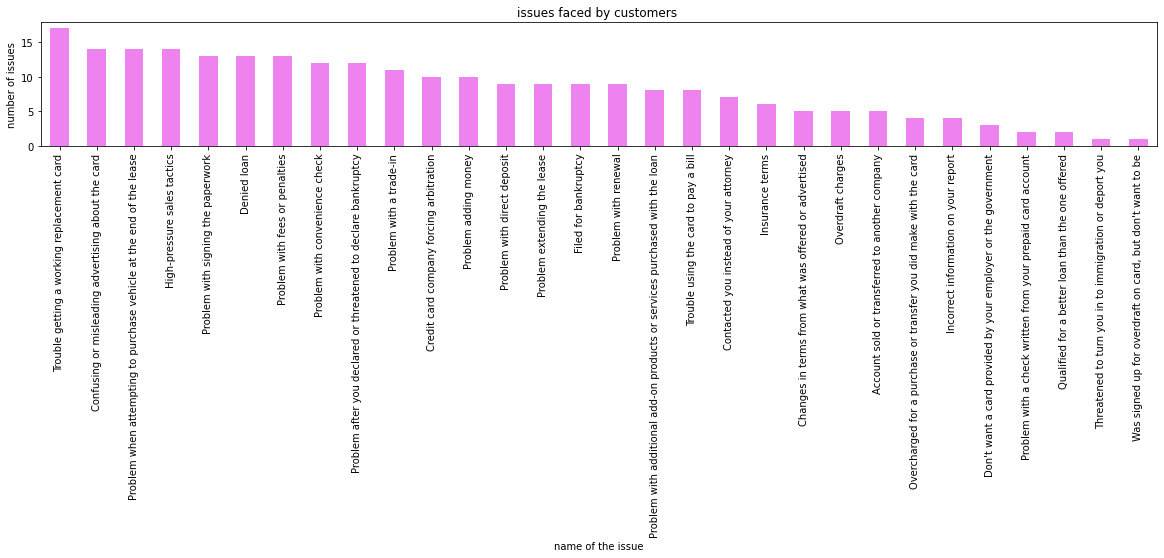

In [36]:
#plot representing  least number of sub-issues faced by consumers
plt.subplot(212)
tail_sub_iss.plot(kind='bar',color='violet', title='issues faced by customers ',figsize=(20, 5))
plt.ylabel("number of issues")
plt.xlabel("name of the issue")

Text(0.5, 0, 'name of the issue')

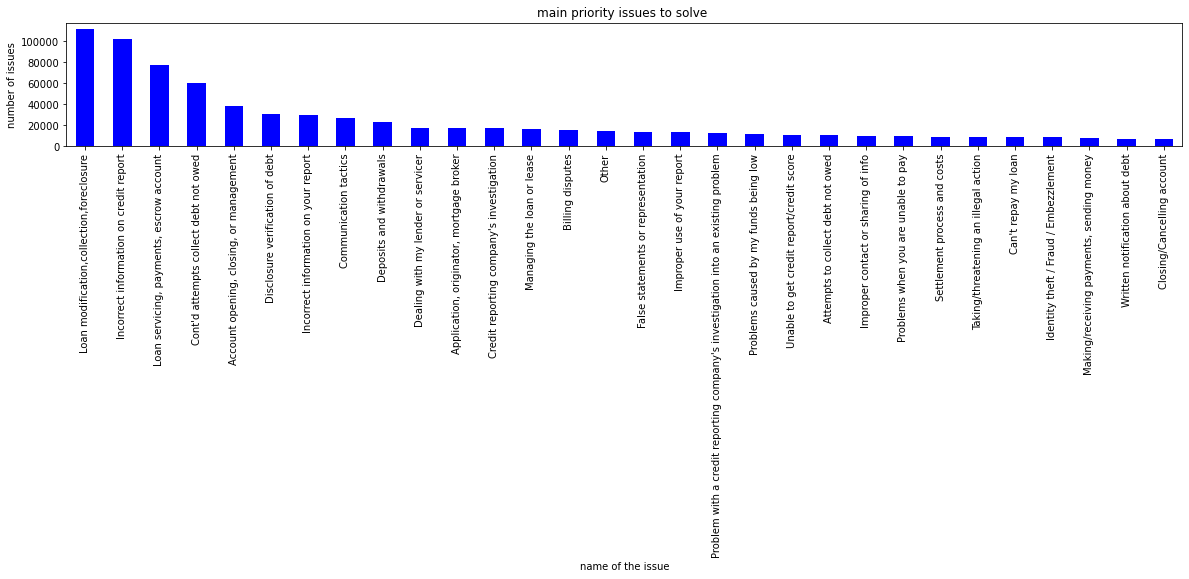

In [37]:
#plot representing most number of issues faced by consumers

plt.subplot(211)
head_tot_issues.plot(kind='bar',color='blue', title='main priority issues to solve ',figsize=(20, 5))
plt.ylabel("number of issues")
plt.xlabel("name of the issue")

Text(0.5, 0, 'name of the issue')

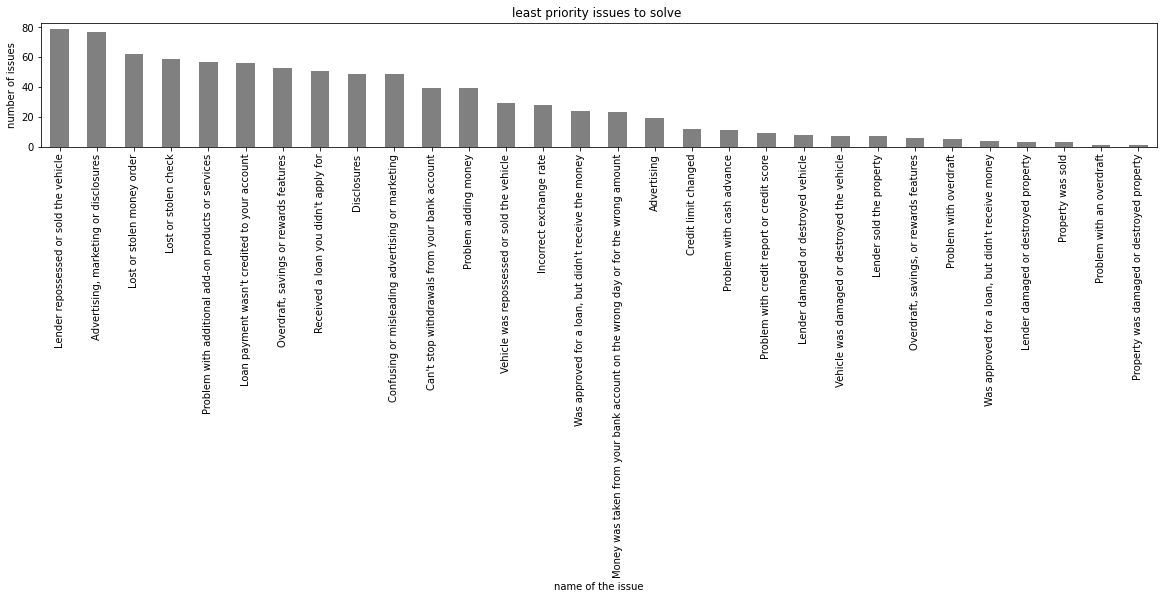

In [38]:
#plot representing  least number of issues faced by consumers

plt.subplot(212)
tail_tot_issues.plot(kind='bar',color='grey', title='least priority issues to solve ',figsize=(20, 5))
plt.ylabel("number of issues")
plt.xlabel("name of the issue")

In [39]:
tot_comp_lst=complaints['Product'].value_counts()

In [40]:
tot_comp_lst

Mortgage                                                                        242194
Debt collection                                                                 171567
Credit reporting                                                                140424
Credit card                                                                      89190
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     59186
Student loan                                                                     38612
Consumer Loan                                                                    31608
Credit card or prepaid card                                                      11921
Checking or savings account                                                       9947
Payday loan                                                                       5546
Money transfers                            

In [41]:
list(tot_comp_lst.index)

['Mortgage',
 'Debt collection',
 'Credit reporting',
 'Credit card',
 'Bank account or service',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Student loan',
 'Consumer Loan',
 'Credit card or prepaid card',
 'Checking or savings account',
 'Payday loan',
 'Money transfers',
 'Prepaid card',
 'Vehicle loan or lease',
 'Payday loan, title loan, or personal loan',
 'Money transfer, virtual currency, or money service',
 'Other financial service',
 'Virtual currency']

Text(0.5, 0, 'product names')

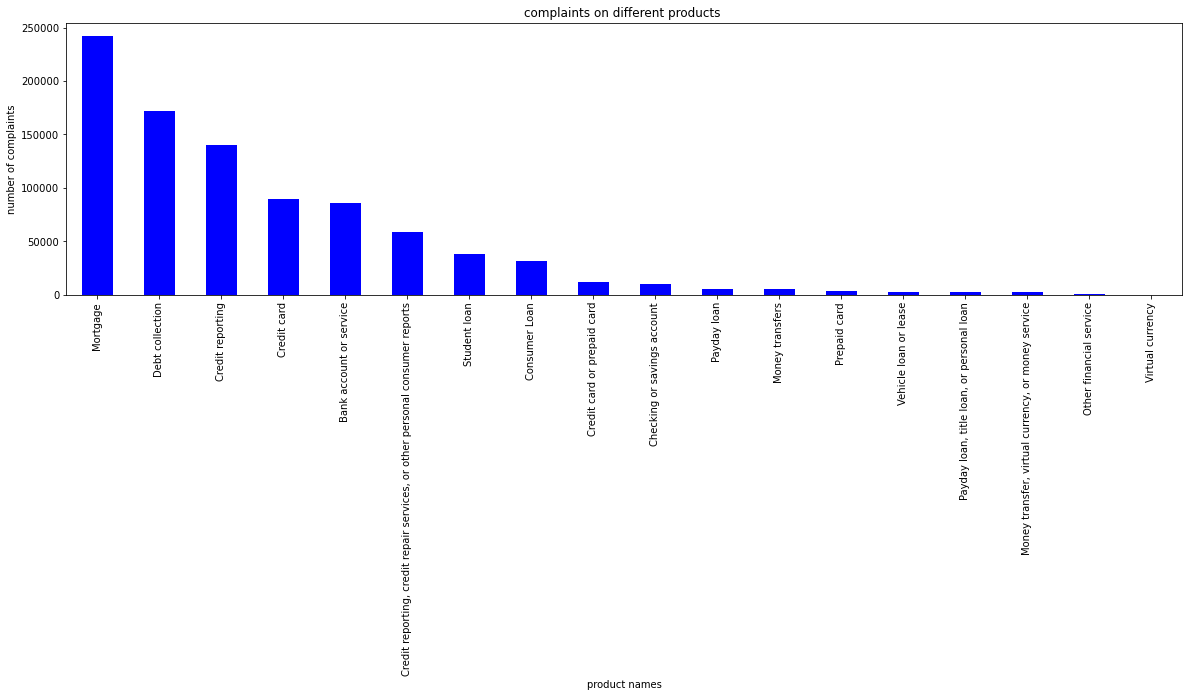

In [42]:
#plot representing complaints on different products
plt.figure(figsize=(20, 5))
plt.subplot(111)
tot_comp_lst.plot(kind='bar',color='blue', title='complaints on different products ')
plt.ylabel("number of complaints")
plt.xlabel("product names")

In [43]:
#comp_group = complaints.groupby(['Product'])['Issue'].sum()
#comp_group

In [44]:
#mode of delivering complaints
sub=complaints['Submitted via'].value_counts()
sub

Web            634850
Referral       142931
Phone           58505
Postal mail     55066
Fax             12277
Email             354
Name: Submitted via, dtype: int64

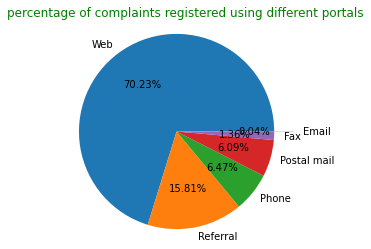

In [45]:
#pie representing complaints registered using different portals
explode = (0, 0, 0, 0, 0, 0.2)
fig1, ax1 = plt.subplots()
ax1.pie(sub, explode=explode, labels=list(sub.index), autopct='%1.2f%%')
ax1.axis('equal')
plt.title("percentage of complaints registered using different portals",color='green')
plt.show()

In [46]:
comp_resp_to_cons=complaints['Company response to consumer'].value_counts()
comp_resp_to_cons

Closed with explanation            686039
Closed with non-monetary relief    108436
Closed with monetary relief         57090
Closed without relief               17868
Closed                              17611
In progress                          7015
Closed with relief                   5304
Untimely response                    4620
Name: Company response to consumer, dtype: int64

In [47]:
comp_resp_to_cons.index

Index(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Closed without relief', 'Closed',
       'In progress', 'Closed with relief', 'Untimely response'],
      dtype='object')

<Figure size 1440x360 with 0 Axes>

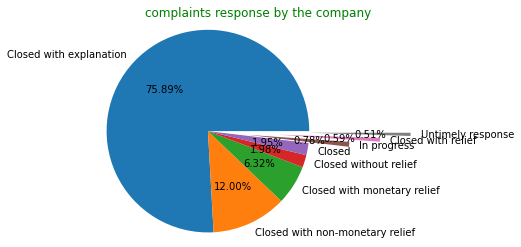

In [48]:
#pie representing complaints response by the company
plt.figure(figsize=(20, 5))
fig1, ax1 = plt.subplots()
ax1.pie(comp_resp_to_cons, explode=(0, 0, 0, 0, 0, 0.4, 0.7, 1), labels=list(comp_resp_to_cons.index), autopct='%1.2f%%')
ax1.axis('equal')
plt.title("complaints response by the company",color='green')
plt.show()

In [49]:
tot_comp_subpro_lst=complaints['Sub-product'].value_counts()
tot_comp_subpro_lst

Other mortgage                            86633
Conventional fixed mortgage               70617
Checking account                          66499
Credit reporting                          57906
Other (i.e. phone, health club, etc.)     44561
                                          ...  
Traveler's check or cashier's check          63
Check cashing service                        51
Gift card                                    51
Transit card                                 37
Electronic Benefit Transfer / EBT card       12
Name: Sub-product, Length: 75, dtype: int64

In [50]:
complaints['Consumer disputed?'].value_counts()

No     620197
Yes    148378
Name: Consumer disputed?, dtype: int64

In [51]:
#filling null values using forward fill method
complaints['Consumer disputed?'] = complaints['Consumer disputed?'].fillna(method='ffill')

In [52]:
complaints['Consumer disputed?'].value_counts()

No     735175
Yes    168808
Name: Consumer disputed?, dtype: int64

In [53]:
# combine 3 columns and apply string function to make one single columns
complaints['new_complaint_narrative'] = complaints[['Issue','Sub-issue','Consumer complaint narrative']].apply(lambda x: ' '.join(x.astype(str)),axis=1)

In [54]:
complaints['new_complaint_narrative'].head()

0     Loan modification,collection,foreclosure nan nan
1    Incorrect information on credit report Account...
2    Managing the loan or lease nan I purchased a n...
3                                   Bankruptcy nan nan
4    Communication tactics Frequent or repeated cal...
Name: new_complaint_narrative, dtype: object

In [55]:
complaints['Product'].head()

0            Mortgage
1    Credit reporting
2       Consumer Loan
3         Credit card
4     Debt collection
Name: Product, dtype: object

In [56]:
# take only two columns
df = complaints[['Product','new_complaint_narrative']]

In [57]:
df.shape

(903983, 2)

In [58]:
df.isnull().sum()

Product                    0
new_complaint_narrative    0
dtype: int64

In [59]:
# what are the different catogories?
df.Product.value_counts()

Mortgage                                                                        242194
Debt collection                                                                 171567
Credit reporting                                                                140424
Credit card                                                                      89190
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     59186
Student loan                                                                     38612
Consumer Loan                                                                    31608
Credit card or prepaid card                                                      11921
Checking or savings account                                                       9947
Payday loan                                                                       5546
Money transfers                            

In [60]:
# combining product categories
df.Product[df.Product == 'Money transfer'] = 'Money transfers , virtual currency, or money service'
df.Product[df.Product == 'Prepaid card'] = 'Credit card or prepaid card'
df.Product[df.Product == 'Virtual currency'] = 'Other financial service'
df.Product[df.Product == 'Credit card'] = 'Credit card or prepaid card'
df.Product[df.Product == 'Payday loan'] = 'Payday loan, title loan, or personal loan'
df.Product[df.Product == 'Credit reporting'] = 'Credit reporting, credit repair services, or other personal consumer reports'

In [61]:
df.Product.value_counts()

Mortgage                                                                        242194
Credit reporting, credit repair services, or other personal consumer reports    199610
Debt collection                                                                 171567
Credit card or prepaid card                                                     104930
Bank account or service                                                          86207
Student loan                                                                     38612
Consumer Loan                                                                    31608
Checking or savings account                                                       9947
Payday loan, title loan, or personal loan                                         7791
Money transfers                                                                   5354
Vehicle loan or lease                                                             2873
Money transfer, virtual currency, or money 

In [62]:
round(len(df)*0.8)

723186

In [63]:
train = df.iloc[0:723186]
test = df.iloc[723186:]

In [64]:
# build ML model pipeline
comp_class = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [65]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(df['new_complaint_narrative'], df['Product'],test_size=0.20,random_state = 0)
# train the model
comp_class.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [66]:
# accuracy on train data
comp_class.score(X_train,y_train)

0.9310135981614688

In [67]:
# accuracy on test data
comp_class.score(X_test,y_test)

0.9300154316719857

In [68]:
Y_pred = comp_class.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[15470,     0,     1,  1539,    44,   107,     0,     0,    53,
            0,     0,     3,     0],
       [  294,   855,     0,   599,   150,    12,     0,     0,     3,
            0,     0,     1,     0],
       [    2,     0,  4982,   448,   220,   418,     0,     0,    55,
            0,    44,    80,     0],
       [  173,     0,     0, 18021,   731,   435,     0,     0,  1713,
            0,     0,    11,     0],
       [    0,     0,     7,   450, 38917,   314,     0,     0,    62,
            0,     0,    21,     0],
       [    0,     0,     5,   110,    78, 34176,     0,     0,    46,
            0,     0,    31,     0],
       [   25,     0,     0,   337,     1,    10,     0,    68,     2,
            0,     0,     1,     0],
       [   14,     0,     0,   805,    20,    76,     0,   134,     2,
            0,     0,     0,     0],
       [    1,     0,     0,   315,   142,   208,     0,     0, 47993,
            0,     0,    15,     0],
       [   19,     0,     0,

In [70]:
new_complaint = ["vehicle loan vehicle lease"]
print(comp_class.predict(new_complaint))

['Consumer Loan']


In [71]:
log_reg = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

In [ ]:
# train the model
log_reg.fit(X_train, y_train)

In [ ]:
# accuracy on train data
log_reg.score(X_train,y_train)

In [ ]:
# accuracy on test data
log_reg.score(X_test,y_test)

In [ ]:
Y_pred_1 = log_reg.predict(X_test)

In [ ]:
cm_1 = confusion_matrix(y_test, Y_pred_1)
cm_1

In [ ]:
new_complaint = ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]
print(log_reg.predict(new_complaint))

In [ ]:
DTC = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', tree.DecisionTreeClassifier()),
])

In [ ]:
# train the model
DTC.fit(X_train, y_train)

In [ ]:
# accuracy on train data
DTC.score(X_train,y_train)

In [ ]:
# accuracy on test data
DTC.score(X_test,y_test)

In [ ]:
Y_pred_2 = DTC.predict(X_test)

In [ ]:
cm_2 = confusion_matrix(y_test, Y_pred_2)
cm_2

In [ ]:
new_complaint = ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]
print(DTC.predict(new_complaint))

In [ ]:
neural = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)),
])

In [ ]:
neural.fit(X_train, y_train)

In [ ]:
neural.score(X_train,y_train)

In [ ]:
neural.score(X_test,y_test)

In [ ]:
Y_pred_4 = neural.predict(X_test)

In [ ]:
cm_4 = confusion_matrix(y_test, Y_pred_4)

cm_4

In [ ]:
new_complaint = ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]
print(neural.predict(new_complaint))

In [ ]:
# save the model
import pickle
pickle.dump(DTC, open("complaint_classification_model_dtc.pkl", 'wb'))

In [ ]:
#load the model
loaded_model = pickle.load(open("complaint_classification_model_dtc.pkl",'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

In [ ]:
df.to_csv("df.csv") #exporting data frame